In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
1,2600,4,120.0
9,3700,5,167.0
11,2785,4,140.0
16,1180,3,48.0
10,1800,3,82.0


In [5]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_scaled = X_scaler.fit_transform(df.drop('price',axis=1))
y_scaled = y_scaler.fit_transform(df[['price']])

In [6]:
X_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [39]:
y_scaled.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [40]:
X_scaled.shape

(20, 2)

In [41]:
def batch_gd(X,y_true,epochs,learning_rate = 0.01):

    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_pred = np.dot(X, w) + b #w1 *ariea + w2 * bedrooms

        w_grad = -(2/total_samples) * np.dot(X.T, (y_true - y_pred))
        b_grad = -(2/total_samples) * np.sum(y_true - y_pred)

        w -= learning_rate * w_grad
        b -= learning_rate * b_grad

        cost = np.mean(np.square(y_true-y_pred))

        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost,cost_list, epoch_list


w, b,cost, cost_list, epoch_list = batch_gd(X_scaled, y_scaled.reshape(y_scaled.shape[0],),550)
w,b,cost



    


(array([0.69975648, 0.66552195]),
 np.float64(-0.22276631251176252),
 np.float64(0.006475707389471892))

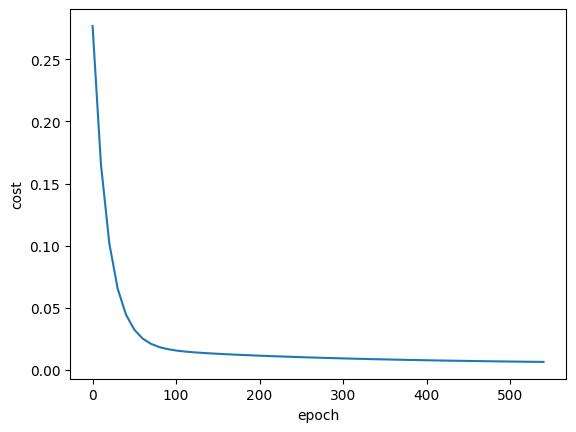

In [42]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [43]:
def predict(area,bedrooms,w,b):
    X = X_scaler.transform([[area,bedrooms]])[0]
    y_pred = np.dot(X,w) + b

    y_pred = np.squeeze(y_scaler.inverse_transform(y_pred.reshape(1,-1)))
    return y_pred

predict(2600,4,w,b)

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array(127.94541299)

In [44]:
predict(1000,2,w,b)

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array(30.9028879)

In [45]:
predict(1500,4,w,b)

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array(92.11305514)

### Stochastic Gredient Descent 

In [46]:
import random

In [47]:
def stochastic_batch_gd(X,y_true,epochs,learning_rate = 0.01):
    number_of_features = X.shape[1]

    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_pred = np.dot(sample_x, w) + b

        w_grad = -(2/total_samples) * np.dot(sample_x.T, (sample_y - y_pred))
        b_grad = -(2/total_samples) * (sample_y - y_pred)

        w -= learning_rate * w_grad
        b -= learning_rate * b_grad

        cost = np.square(sample_y-y_pred)

        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost,cost_list, epoch_list

w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd = stochastic_batch_gd(X_scaled, y_scaled.reshape(y_scaled.shape[0],),10000)
w_sgd,b_sgd,cost_sgd

(array([0.70728473, 0.67575524]),
 np.float64(-0.22943236341345097),
 np.float64(0.002174867600977))

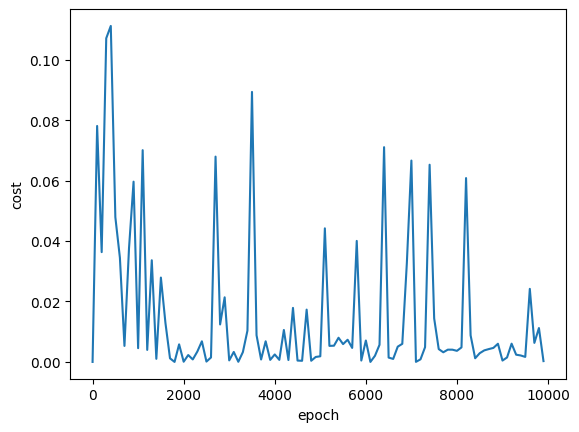

In [48]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)

In [49]:
predict(2600,4,w_sgd,b_sgd)

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array(128.71243145)

### Mini Batch Gradient Descent

In [63]:

def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    
    X_scaled,
    y_scaled.reshape(X_scaled.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost


(array([0.71008453, 0.67803324]),
 np.float64(-0.23351733680639972),
 np.float64(0.01869851853002755))

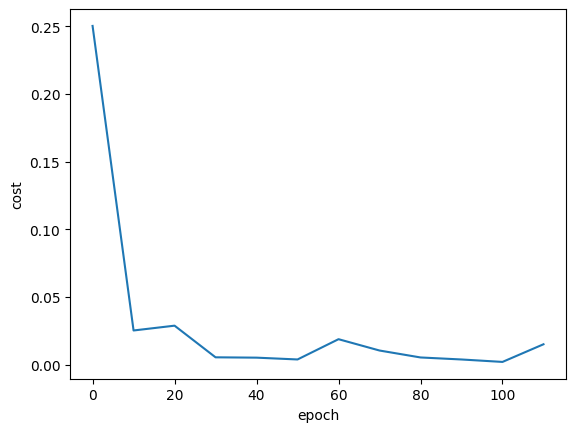

In [64]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)